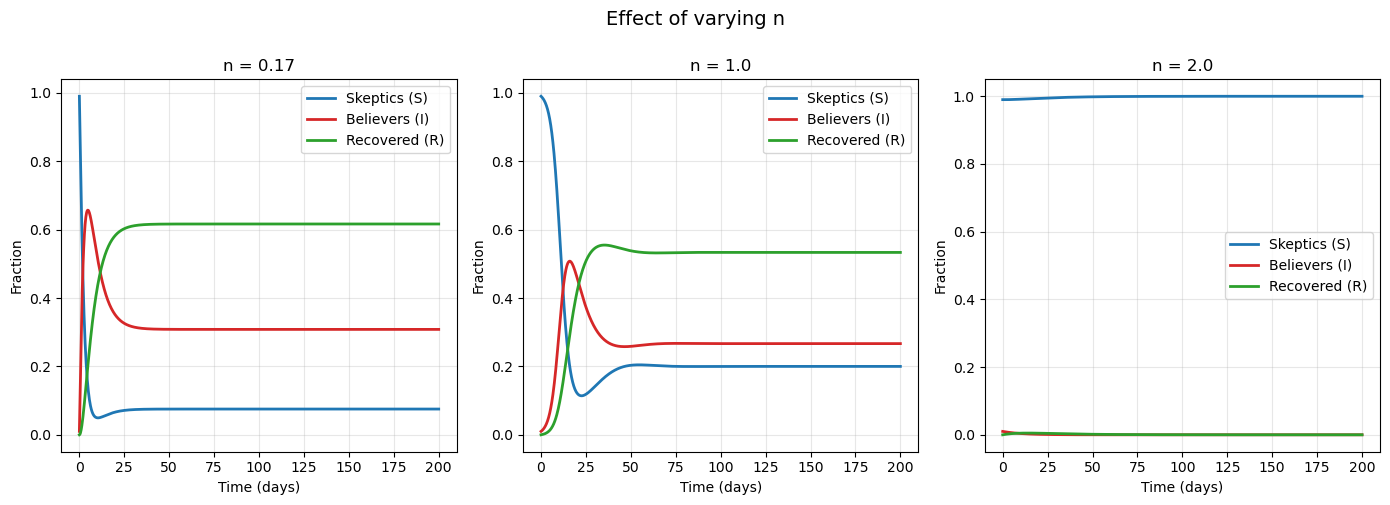

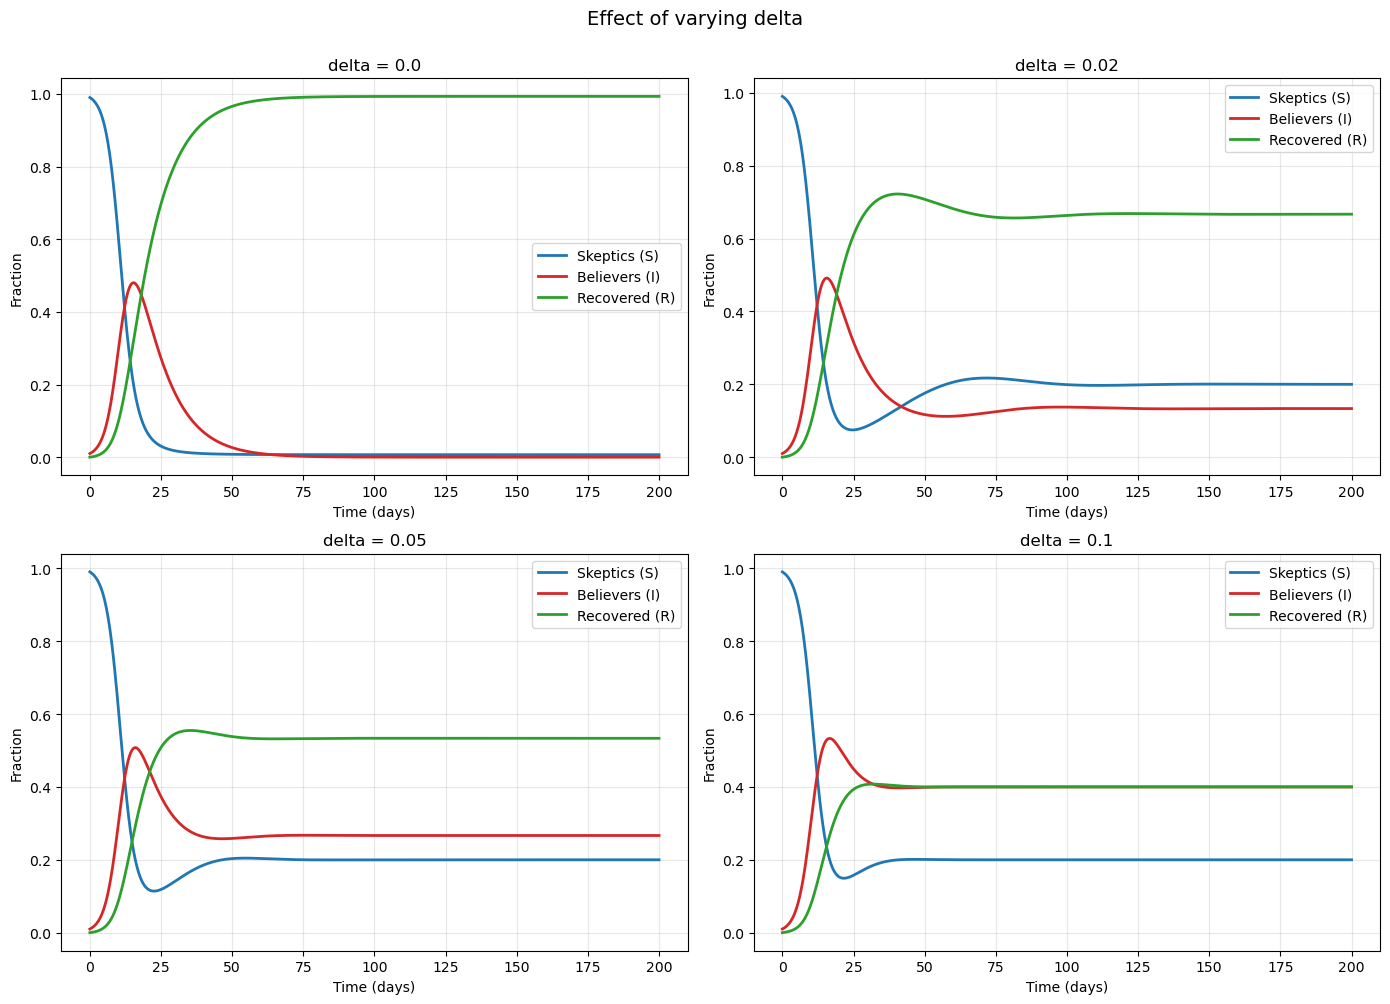

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def ODEs(x, t, beta, gamma, delta, n):
    S, I, R = x
    infection = beta * S * (I ** n)
    dS = -infection + delta * R
    dI = infection - gamma * I
    dR = gamma * I - delta * R
    return [dS, dI, dR]

def run_simulation(beta, gamma, delta, n, x_0, tmax=200):
    """
    args:
        beta: misinformation transmission rate
        gamma: believers verification rate
        delta: debunkers forgetting rate
        n: conformity parameter
        x_0: initial conditions
        tmax: maximum time
    """
    t_vec = np.linspace(0, tmax, 1000)
    G = lambda m, t: ODEs(m, t, beta, gamma, delta, n)
    x_path = odeint(G, x_0, t_vec)
    return t_vec, x_path

base_params = {
    'beta': 0.5, # misinformation transmission rate
    'gamma': 0.1, # believers verification rate
    'delta': 0.05, # debunkers forgetting rate
    'n': 1.0 # conformity parameter
}
base_initial = np.array([0.99, 0.01, 0.0])

def explore_parameter(param_name, param_values, base_params, base_initial, custom_plot_dims=None):
    """
    args:
        param_name: name of the parameter to explore
        param_values: list of values to explore
        base_params: dictionary of base parameters
        base_initial: initial conditions
    """
    if custom_plot_dims is None:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(custom_plot_dims[0], custom_plot_dims[1], figsize=custom_plot_dims[2])
        axes = axes.flatten()
    
    for idx, value in enumerate(param_values):
        params = base_params.copy()
        params[param_name] = value
        
        t_vec, x_path = run_simulation(
            params['beta'], params['gamma'], 
            params['delta'], params['n'], 
            base_initial
        )
        
        ax = axes[idx]
        ax.plot(t_vec, x_path[:, 0], lw=2, label='Skeptics (S)', color='tab:blue')
        ax.plot(t_vec, x_path[:, 1], lw=2, label='Believers (I)', color='tab:red')
        ax.plot(t_vec, x_path[:, 2], lw=2, label='Recovered (R)', color='tab:green')
        ax.set_title(f'{param_name} = {value}')
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Fraction')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle(f'Effect of varying {param_name}', fontsize=14, y=1.00)
    plt.tight_layout()
    plt.savefig(f'images/{param_name}_effect.png')
    plt.show()

# Example: Explore different n values
explore_parameter('n', [0.17, 1.0, 2.0], base_params, base_initial, custom_plot_dims=(1, 3, (14, 5)))

# Explore forgetting rate
explore_parameter('delta', [0.0, 0.02, 0.05, 0.1], base_params, base_initial)

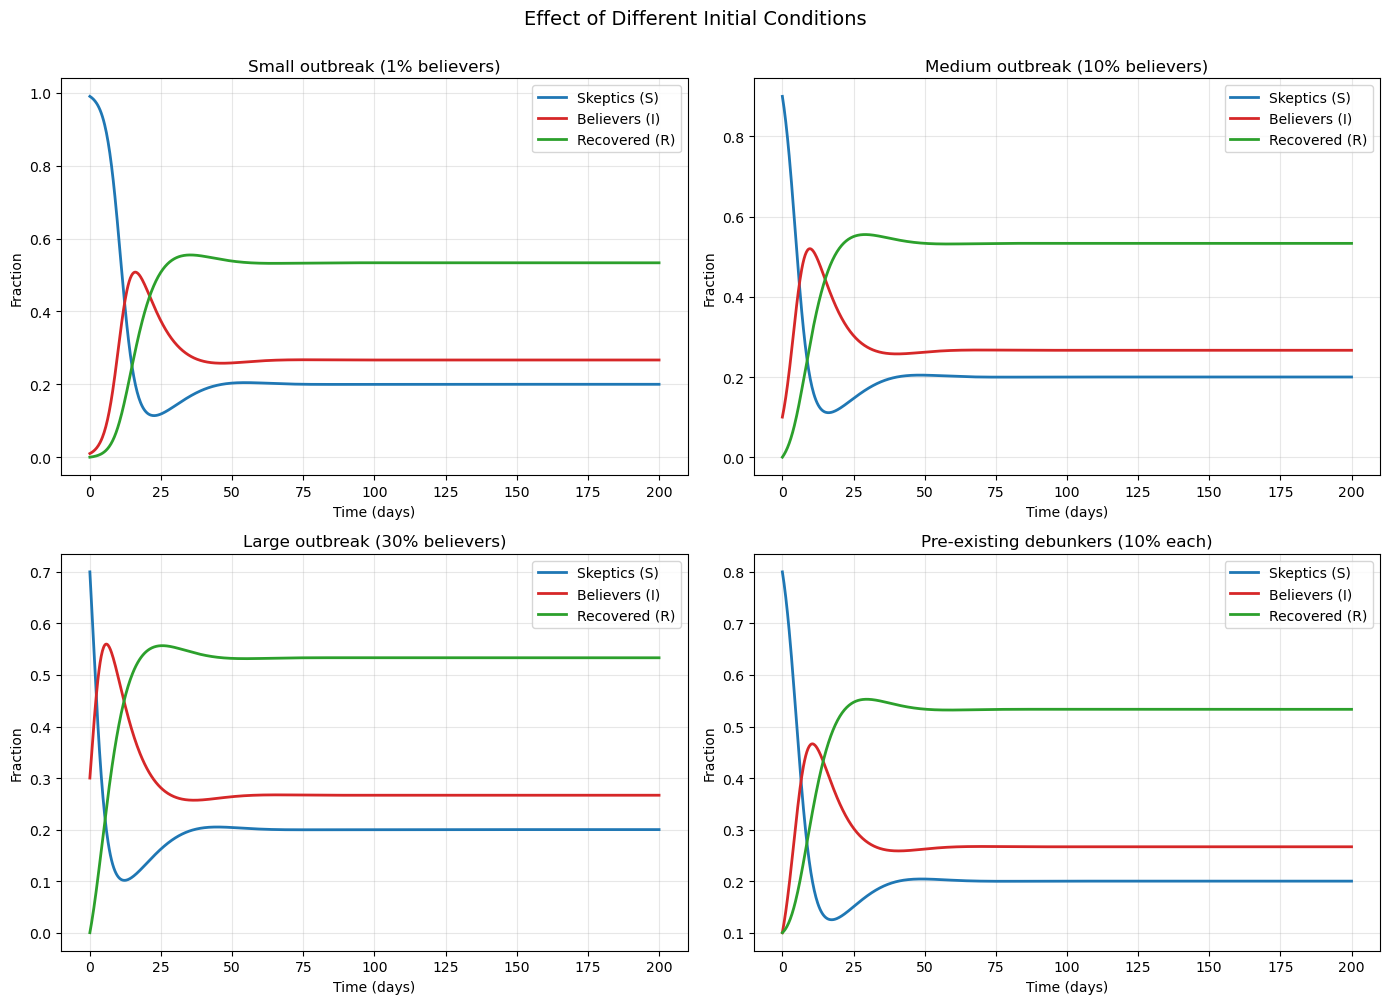

In [33]:
def explore_initial_conditions(initial_conditions_list, base_params):
    """
    args:
        initial_conditions_list: list of initial conditions
        base_params: dictionary of base parameters
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for idx, (x_0, label) in enumerate(initial_conditions_list):
        t_vec, x_path = run_simulation(
            base_params['beta'], base_params['gamma'],
            base_params['delta'], base_params['n'],
            x_0
        )
        
        ax = axes[idx]
        ax.plot(t_vec, x_path[:, 0], lw=2, label='Skeptics (S)', color='tab:blue')
        ax.plot(t_vec, x_path[:, 1], lw=2, label='Believers (I)', color='tab:red')
        ax.plot(t_vec, x_path[:, 2], lw=2, label='Recovered (R)', color='tab:green')
        ax.set_title(label)
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Fraction')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Effect of Different Initial Conditions', fontsize=14, y=1.00)
    plt.tight_layout()
    plt.savefig('images/initial_conditions_effect.png')
    plt.show()

# Different starting scenarios
initial_conditions = [
    (np.array([0.99, 0.01, 0.0]), 'Small outbreak (1% believers)'),
    (np.array([0.90, 0.10, 0.0]), 'Medium outbreak (10% believers)'),
    (np.array([0.70, 0.30, 0.0]), 'Large outbreak (30% believers)'),
    (np.array([0.80, 0.10, 0.10]), 'Pre-existing debunkers (10% each)')
]

explore_initial_conditions(initial_conditions, base_params)